In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Encoding Ordinal features (or label)
## Encoding Categorical features (or label)

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.DataFrame({'blood':['A','B','AB','O','B'], 
                   'Y':['high','low','high','mid','mid'],
                   'Z':[np.nan,np.nan,-1196,72,83]});
df

,blood,Y,Z
0,A,high,NaN
1,B,low,NaN
2,AB,high,-1196.0
3,O,mid,72.0
4,B,mid,83.0


In [4]:
df ['blood']

0     A
1     B
2    AB
3     O
4     B
Name: blood, dtype: object

In [5]:
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(df ['blood'])
print(encoded_Y)
df['blood']=encoded_Y
df['Y']=encoder.fit_transform(df ['Y'])

[0 2 1 3 2]


In [6]:
df

,blood,Y,Z
0,0,0,NaN
1,2,1,NaN
2,1,0,-1196.0
3,3,2,72.0
4,2,2,83.0


## one hot encoding

In [7]:
from keras.utils import np_utils
# convert integers to one hot encoding
dummy_y = np_utils.to_categorical(encoded_Y)  # one-hot encoding [0. 1. 0.] 
dummy_y

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [8]:
type(dummy_y)

numpy.ndarray

In [9]:
dummy_y[:,2]

array([0., 1., 0., 0., 1.], dtype=float32)

In [10]:
df['blood_1']=dummy_y[:,0]
df['blood_2']=dummy_y[:,1]
df['blood_3']=dummy_y[:,2]
df['blood_4']=dummy_y[:,3]
df


,blood,Y,Z,blood_1,blood_2,blood_3,blood_4
0,0,0,NaN,1.0,0.0,0.0,0.0
1,2,1,NaN,0.0,0.0,1.0,0.0
2,1,0,-1196.0,0.0,1.0,0.0,0.0
3,3,2,72.0,0.0,0.0,0.0,1.0
4,2,2,83.0,0.0,0.0,1.0,0.0


In [11]:
df

,blood,Y,Z,blood_1,blood_2,blood_3,blood_4
0,0,0,NaN,1.0,0.0,0.0,0.0
1,2,1,NaN,0.0,0.0,1.0,0.0
2,1,0,-1196.0,0.0,1.0,0.0,0.0
3,3,2,72.0,0.0,0.0,0.0,1.0
4,2,2,83.0,0.0,0.0,1.0,0.0


In [12]:
dummy_y

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [66]:
df['Z']

0    -347.0
1    -347.0
2   -1196.0
3      72.0
4      83.0
Name: Z, dtype: float64

## 刪除欄

In [13]:
try:
    df=df.drop(['blood'], axis=1)
except:
    pass


In [14]:
df

,Y,Z,blood_1,blood_2,blood_3,blood_4
0,0,NaN,1.0,0.0,0.0,0.0
1,1,NaN,0.0,0.0,1.0,0.0
2,0,-1196.0,0.0,1.0,0.0,0.0
3,2,72.0,0.0,0.0,0.0,1.0
4,2,83.0,0.0,0.0,1.0,0.0


## 檢查是否有缺值

In [15]:
mask = df.isnull()  #nan represents 'missing data'
mask

,Y,Z,blood_1,blood_2,blood_3,blood_4
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [16]:
df['Z'].mean()

-347.0

In [17]:
mask = df['Z'].isnull()
mask

0     True
1     True
2    False
3    False
4    False
Name: Z, dtype: bool

## 缺值處理

In [18]:
#刪除有缺值的列
df.iloc[0,1]=np.nan
df

,Y,Z,blood_1,blood_2,blood_3,blood_4
0,0,NaN,1.0,0.0,0.0,0.0
1,1,NaN,0.0,0.0,1.0,0.0
2,0,-1196.0,0.0,1.0,0.0,0.0
3,2,72.0,0.0,0.0,0.0,1.0
4,2,83.0,0.0,0.0,1.0,0.0


## 刪除有缺值的資料

In [19]:
df.dropna() 

,Y,Z,blood_1,blood_2,blood_3,blood_4
2,0,-1196.0,0.0,1.0,0.0,0.0
3,2,72.0,0.0,0.0,0.0,1.0
4,2,83.0,0.0,0.0,1.0,0.0


In [20]:
df

,Y,Z,blood_1,blood_2,blood_3,blood_4
0,0,NaN,1.0,0.0,0.0,0.0
1,1,NaN,0.0,0.0,1.0,0.0
2,0,-1196.0,0.0,1.0,0.0,0.0
3,2,72.0,0.0,0.0,0.0,1.0
4,2,83.0,0.0,0.0,1.0,0.0


## 刪除有缺值的欄位

In [21]:
df.iloc[0,0]=np.nan
df.dropna (axis=1) 

,blood_1,blood_2,blood_3,blood_4
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0


## 用平均數填入缺值

In [22]:
df['Z'].fillna(df['Z'].mean(), inplace=True) #使用欄欄位的平均值填充缺失值
df

,Y,Z,blood_1,blood_2,blood_3,blood_4
0,NaN,-347.0,1.0,0.0,0.0,0.0
1,1.0,-347.0,0.0,0.0,1.0,0.0
2,0.0,-1196.0,0.0,1.0,0.0,0.0
3,2.0,72.0,0.0,0.0,0.0,1.0
4,2.0,83.0,0.0,0.0,1.0,0.0


In [23]:
df

,Y,Z,blood_1,blood_2,blood_3,blood_4
0,NaN,-347.0,1.0,0.0,0.0,0.0
1,1.0,-347.0,0.0,0.0,1.0,0.0
2,0.0,-1196.0,0.0,1.0,0.0,0.0
3,2.0,72.0,0.0,0.0,0.0,1.0
4,2.0,83.0,0.0,0.0,1.0,0.0


## 找出outlier

In [24]:
std=df['Z'].std()
std

519.9187436513517

In [25]:
abs(df['Z'])>std*2

0    False
1    False
2     True
3    False
4    False
Name: Z, dtype: bool

In [26]:
rawid=df[abs(df['Z'])>std*2]
rawid

,Y,Z,blood_1,blood_2,blood_3,blood_4
2,0.0,-1196.0,0.0,1.0,0.0,0.0


## 刪除outlier

In [27]:
rawid.index

Int64Index([2], dtype='int64')

In [28]:
df.drop(rawid.index)

,Y,Z,blood_1,blood_2,blood_3,blood_4
0,NaN,-347.0,1.0,0.0,0.0,0.0
1,1.0,-347.0,0.0,0.0,1.0,0.0
3,2.0,72.0,0.0,0.0,0.0,1.0
4,2.0,83.0,0.0,0.0,1.0,0.0


## 載入Iris資料集

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。


In [29]:
iris = datasets.load_iris()
#print(iris.DESCR)

In [30]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
type(iris.data)

numpy.ndarray

In [32]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [33]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
X = iris.data[:, :2] # we only take the first two features. We could
print(X.shape)
Y = iris.target


(150, 2)


In [35]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [36]:
print(iris['data'].size)
print("target_names: "+str(iris['target_names']))


600
target_names: ['setosa' 'versicolor' 'virginica']


In [37]:
y = pd.DataFrame(iris['target'], columns=['target'])
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [85]:
iris_data = pd.concat([x,y], axis=1)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [86]:
type(iris_data)

pandas.core.frame.DataFrame

In [39]:
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [89]:
iris_data[iris_data['target'].isin([0,1])]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [40]:
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


## train_test_split()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3)

In [42]:
X_train.head()

,sepal length (cm),petal length (cm)
23,5.1,1.7
70,5.9,4.8
38,4.4,1.3
83,6.0,5.1
56,6.3,4.7


In [93]:
len(X_test)

30

In [43]:
X_test.head()

,sepal length (cm),petal length (cm)
32,5.2,1.5
92,5.8,4.0
29,4.7,1.6
46,5.1,1.6
58,6.6,4.6


## Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [75]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    #print(stats)
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [98]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [99]:
X_train

,sepal length (cm),petal length (cm)
23,5.1,1.7
70,5.9,4.8
38,4.4,1.3
83,6.0,5.1
56,6.3,4.7
...,...,...
63,6.1,4.7
40,5.0,1.3
51,6.4,4.5
99,5.7,4.1


In [100]:
z_score(X_train, stats)

,sepal length (cm),petal length (cm)
23,-0.583698,-0.828910
70,0.688173,1.284762
38,-1.696584,-1.101642
83,0.847156,1.489311
56,1.324108,1.216579
...,...,...
63,1.006140,1.216579
40,-0.742681,-1.101642
51,1.483092,1.080213
99,0.370205,0.807481


In [101]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(y_train)
arr_x_train[:5]

array([[-0.58369759, -0.82891004],
       [ 0.68817264,  1.28476186],
       [-1.69658404, -1.1016419 ],
       [ 0.84715642,  1.48931076],
       [ 1.32410776,  1.2165789 ]])

In [102]:
arr_x_train

array([[-0.58369759, -0.82891004],
       [ 0.68817264,  1.28476186],
       [-1.69658404, -1.1016419 ],
       [ 0.84715642,  1.48931076],
       [ 1.32410776,  1.2165789 ],
       [ 0.68817264,  0.87566407],
       [-1.06064893, -0.89709301],
       [ 1.8010591 ,  1.01203   ],
       [-1.06064893, -0.89709301],
       [ 1.48309154,  0.94384704],
       [ 0.52918886, -1.16982486],
       [ 1.96004287,  1.42112779],
       [ 1.16512398,  1.08021297],
       [-0.10674625,  1.08021297],
       [-1.53760026, -1.1016419 ],
       [-0.10674625, -0.82891004],
       [-1.85556782, -1.23800783],
       [ 0.37020509,  0.87566407],
       [-1.06064893, -1.03345893],
       [-0.74268137, -0.89709301],
       [-1.37861648, -0.96527597],
       [ 0.05223753, -1.1016419 ],
       [ 0.37020509,  1.08021297],
       [ 0.84715642,  1.08021297],
       [-0.10674625, -1.1016419 ],
       [ 0.05223753,  0.60293222],
       [ 0.52918886,  0.67111518],
       [-0.90166515,  0.26201739],
       [-0.10674625,

In [107]:
arr_x_train[:,1].mean()

-1.6494742080145183e-16

In [106]:
arr_x_train[:,1].std()

1.0

## use sklearn

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.46714286 2.91571429]
[0.62899499 1.46664201]


In [109]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.58369759, -0.82891004],
       [ 0.68817264,  1.28476186],
       [-1.69658404, -1.1016419 ],
       [ 0.84715642,  1.48931076],
       [ 1.32410776,  1.2165789 ]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [48]:
##sc = StandardScaler().fit(X_test)  --error
X_test_std = sc.transform(X_test)
print(X_test_std)

[[-0.42471381 -0.96527597]
 [ 0.52918886  0.73929814]
 [-1.2196327  -0.89709301]
 [-0.58369759 -0.89709301]
 [ 1.8010591   1.14839593]
 [-1.37861648 -1.30619079]
 [-0.10674625 -0.96527597]
 [ 1.0061402   1.14839593]
 [ 2.43699421  1.2165789 ]
 [ 1.0061402   0.73929814]
 [ 0.21122131  0.67111518]
 [ 0.52918886  0.80748111]
 [ 0.37020509  0.39838332]
 [-1.2196327  -1.1016419 ]
 [ 1.64207532  1.14839593]
 [-0.74268137 -1.03345893]
 [ 0.05223753  1.01203   ]
 [ 1.96004287  1.01203   ]
 [-0.58369759 -0.96527597]
 [-0.74268137 -0.89709301]
 [-0.74268137 -0.96527597]
 [-1.69658404 -1.03345893]
 [-0.74268137 -0.89709301]
 [ 0.37020509 -0.82891004]
 [-0.58369759 -1.03345893]
 [ 0.21122131  0.46656629]
 [-0.58369759 -0.69254411]
 [ 1.32410776  1.01203   ]
 [-0.74268137  0.39838332]
 [-0.74268137 -1.16982486]]


you can also use fit_transform method (i.e., fit and then transform)    

In [49]:
                      
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.42424242 -0.89674904]
 [ 0.48484848  0.9209855 ]
 [-1.18181818 -0.82403966]
 [-0.57575758 -0.82403966]
 [ 1.6969697   1.35724179]
 [-1.33333333 -1.26029594]
 [-0.12121212 -0.89674904]
 [ 0.93939394  1.35724179]
 [ 2.3030303   1.42995117]
 [ 0.93939394  0.9209855 ]]


In [50]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 1.0


## Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    


50.3634971124542
30.058931368575514


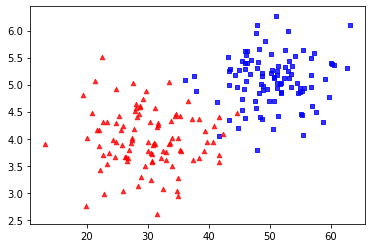

In [154]:
np.random.seed(1)
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [155]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [156]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [157]:
minmax_norm(x_val[:10])

array([0.97022838, 0.41760651, 0.43826331, 0.30362424, 0.78266733,
       0.        , 1.        , 0.38067187, 0.64763985, 0.50716524])

##   MinMaxScaler from sklearn

In [159]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[63.11345244]
[[0.93247949]
 [0.66345838]
 [0.67351429]
 [0.60797083]
 [0.84117315]
 [0.46016392]
 [0.94697257]
 [0.64547828]
 [0.7754406 ]
 [0.70705635]]


## Normalization

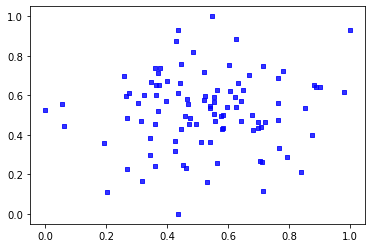

In [200]:
from sklearn.preprocessing import MinMaxScaler
np.random.seed(1)
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x_val=x1.reshape(-1, 1)
scaler_x = MinMaxScaler().fit(x_val)  # default range 0~1

y_val=y1.reshape(-1, 1)
scaler_y = MinMaxScaler().fit(y_val)  # default range 0~1

x1_normal=scaler_x.transform(x_val)
y1_normal=scaler_y.transform(y_val)
plt.scatter(x1_normal,y1_normal,c='b',marker='s',s=20,alpha=0.8)


50.3634971124542


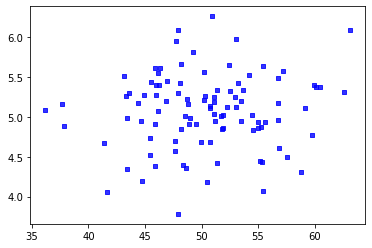

In [201]:

plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
print(np.sum(x1)/len(x1))


In [56]:
#sometime you may use this
x_diff = max(x_val)-min(x_val)
y_diff = max(y_val)-min(y_val)
x_normalized = [(x-min(x_val))/(x_diff) for x in x_val]
y_normalized = [(y-min(y_val))/(y_diff) for y in y_val]
xy_normalized = zip(x_normalized,y_normalized)
#print(x_normalized)
#創建label
labels = [1]*200+[2]*200
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 